<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/06_MachineLearning/blob/main/01_Basic/04_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

In this course, we will learn more about clustering algorithms. Clustering algorithms are able to group data on a dataset, defining groups for different entries. Clustering is heavily performed in customer segmentation, for instance. In this course, we will use the following packages:

In [73]:
!pip install biokit --quiet

In [121]:
import plotly.graph_objects as go
from biokit.viz import corrplot
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

from sklearn.cluster import estimate_bandwidth

from sklearn.metrics import silhouette_score

In this course, we will try to cluster different wines from a dataset:

In [75]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv')

In [76]:
df.head( )

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [77]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


So, our dataset has 178 entries with information about different wines. Here, we want to cluster these wines into different groups using an adequate clustering algorithm. For that end, we will use the features of our data (here, we have 14 features).

Let's understand more about our features using a describe:

In [78]:
df.describe( )

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


Note that it might be important to normalize our features, so that we do not give a stronger importance to a feature over the other. Also, let's see the correlation between our features:

In [79]:
corr_mat = df.corr( )

corr_mat

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


To improve our visualization, we will use the biokit library to see the correlation between features:

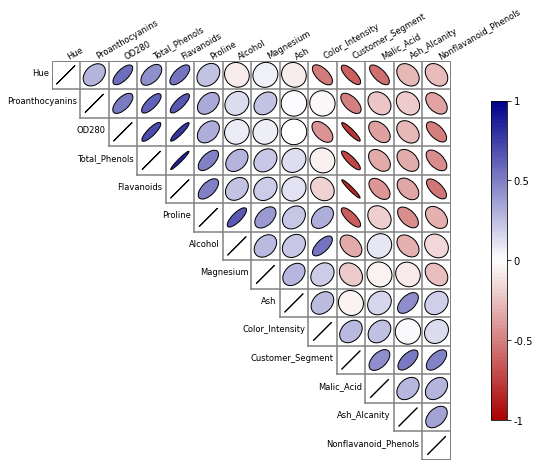

In [80]:
corr_graf = corrplot.Corrplot(corr_mat)
corr_graf.plot(upper = 'ellipse')
fig = plt.gcf( )
fig.set_size_inches(14, 8)

Thus, here, we can see more clear the positive (blue) and negative (red) correlation. The closer to a line, the stronger the correlation. For instance, Total_Phenols has a very strong correlation with Flavanoids. Also, Customer_Segment has a very strong negative correlation with Flavanoids, and so on.

Finally, let's normalize our data using SKLearn:

In [81]:
scaler = MinMaxScaler( )
df_0 = scaler.fit_transform(df)

Here, we used a MinMaxScaler, which normalizes our data between 0 and 1:

In [82]:
df_0

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.97069597, 0.56134094,
        0.        ],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.78021978, 0.55064194,
        0.        ],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.6959707 , 0.64693295,
        0.        ],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.10622711, 0.39728959,
        1.        ],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.12820513, 0.40085592,
        1.        ],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.12087912, 0.20114123,
        1.        ]])

Note that, now, our dataframe was transformed into an array of lists. We can turn it back to a dataframe using:

In [83]:
df_0 = pd.DataFrame(df_0, columns = df.columns)
df_0

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,1.0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1.0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1.0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1.0


Nice! Now, let's check if the Min-Max Scaler worked:

In [84]:
df_0.describe( )

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nice! Now, all of our features are normalized, and all values are between 0 and 1.

# K-means

Finally, we will start working with some well-known clustering algorithms. First, we will use K-means. We simply have to instance the algorithm, then fit. Fianlly, we get the clusters for our entries:


In [85]:
kmeans = KMeans(n_clusters = 4)

kmeans.fit(df_0)

KMeans(n_clusters=4)

So, our model defined the following groups for our features:

In [86]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 3, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

Note that we have 4 different groups, as we stated when instancing the algorithm. Now, let's try to visualize these clusters. First, let's create a new dataframe with our labels:

In [87]:
df_kmeans = df_0.copy( )
df_kmeans['ClusterWines'] = kmeans.labels_

Now, let's use plotly to visualize our data in two dimensions:

In [88]:
fig = go.Figure( )
sp = go.Scatter(x = df_kmeans['Color_Intensity'], y = df_kmeans['Alcohol'], mode = 'markers', marker = dict(color = df_kmeans.ClusterWines.astype(float)), text = df_kmeans.ClusterWines)
fig.add_trace(sp)

Note that we can see that there is a relationship between the color intensity and the alcohol. Also, our clusters are shown as different colors in our scatter plot. However, still, it is not easy to differ these, since we had to choose only two features to show. Also, this might mean that a lower number of clusters are required for this problem. Let's try to use only 3 clusters:

In [89]:
kmeans = KMeans(n_clusters = 3)

kmeans.fit(df_0)

df_kmeans['ClusterWines'] = kmeans.labels_

In [90]:
fig = go.Figure( )
sp = go.Scatter(x = df_kmeans['Color_Intensity'], y = df_kmeans['Alcohol'], mode = 'markers', marker = dict(color = df_kmeans.ClusterWines.astype(float)), text = df_kmeans.ClusterWines)
fig.add_trace(sp)

Nice! Now, it seems that our clusters are more appropriately divided. Also, let's try to add an attribute to our plot, to see if it helps us in identifying these distinctions:

In [91]:
fig = go.Figure( )
sp = go.Scatter3d(x = df_kmeans['Color_Intensity'], y = df_kmeans['Alcohol'], z = df_kmeans['Proline'], mode = 'markers', marker = dict(color = df_kmeans.ClusterWines.astype(float)), text = df_kmeans.ClusterWines)
fig.add_trace(sp)

fig.update_layout(scene = dict(xaxis_title = 'Color intensity', yaxis_title = 'Alcohol', zaxis_title = 'Proline'))

Indeed, by considering a new axis, it seems that our clusters are easier to identify. Also, we can add the cluster center to our figure, to make it easier to understand why each entry is being identified as a cluster.

In [92]:
kmeans_centers = pd.DataFrame(kmeans.cluster_centers_)
kmeans_centers.columns = df_0.columns

In [93]:
fig = go.Figure( )
sp1 = go.Scatter3d(x = df_kmeans['Color_Intensity'], y = df_kmeans['Alcohol'], z = df_kmeans['Proline'], mode = 'markers', marker = dict(color = df_kmeans.ClusterWines.astype(float)), text = df_kmeans.ClusterWines)
fig.add_trace(sp1)
sp2 = go.Scatter3d(x = kmeans_centers['Color_Intensity'], y = kmeans_centers['Alcohol'], z = kmeans_centers['Proline'], mode = 'markers', marker = dict(color = 'red'), text = [0, 1, 2])
fig.add_trace(sp2)

fig.update_layout(scene = dict(xaxis_title = 'Color intensity', yaxis_title = 'Alcohol', zaxis_title = 'Proline'))

The centers are being shown in red. It seems that the centers really stayed close to the center of the clusters, and are sufficiently far from each other. This may mean that the visualization using 3 dimensions is satisfactory, and that 3 clusters might be good for our data. However, we can use a more appropriate metric to get the most appropriate number of clusters for our dataset.

# DBSCAN

Another method for clustering is the DBSCAN. This method identifies cores with high density of samples, and expands from those cores to form the clusters. We can use it from:

In [94]:
dbscan = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')

dbscan.fit(df_0)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

We can see the labels for our groups using:

In [95]:
dbscan.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

Note that, here, we have a negative label. These negative labels mean that the sample is noise, and could not be fitted in any cluster. To see how many clusters we have, we can use:

In [96]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2])

The DBSCAN has some advantages over K-means, mainly:

*   It is able to identify outliers in the data.
*   It can detect any shape of configuration of clusters.
*   Computational cost is not very high.
*   It is the second most used clustering algorithm (behind $k$-means).

Some drawbacks are that you need to specify some parameters that are hard to define, such as the minimum radial distance to look for a group (```eps```) and the minimum number of samples in a group.


So, we saw that our DBScan algorithm identified a lot of noisy data. Let's try to change those parameters:

In [97]:
dbscan = DBSCAN(eps = 2, min_samples = 5, metric = 'manhattan')

dbscan.fit(df_0)

DBSCAN(eps=2, metric='manhattan')

In [98]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

Note that, this time, almost all samples were considered in the same cluster. Thus, let's change our parameters once again:

In [99]:
dbscan = DBSCAN(eps = 1.5, min_samples = 5, metric = 'manhattan')

dbscan.fit(df_0)

DBSCAN(eps=1.5, metric='manhattan')

In [100]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2])

Using ```eps = 1.5```, it seems that we have less noise. Let's try to change the distance metric:

In [139]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5, metric = 'euclidean')

dbscan.fit(df_0)

DBSCAN()

In [140]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2])

Note that we also changed the ```eps```, as the parameter is affected by the distance metric employed. Let's try to visualize this data:

In [103]:
df_clusters = df_kmeans.copy( )
df_clusters['ClusterWines_DBSCAN'] = dbscan.labels_

In [104]:
fig = go.Figure( )
sp = go.Scatter3d(x = df_clusters['Color_Intensity'], y = df_clusters['Alcohol'], z = df_clusters['Proline'], mode = 'markers', marker = dict(color = df_clusters.ClusterWines_DBSCAN.astype(float)), text = df_clusters.ClusterWines_DBSCAN)
fig.add_trace(sp)

fig.update_layout(scene = dict(xaxis_title = 'Color intensity', yaxis_title = 'Alcohol', zaxis_title = 'Proline'))

Now, we can identify our clusters from 3 different colors. Also, we can see some outliers. Note that DBSCAN does not make clusters based on a radial distance from a center. Clusters are formed based on the distance from a point and the other points of the same cluster. Thus, noisy data occurs due to a data point being very far away from all other points, not being able to form a group of at least ```min_samples = 5``` samples.

Also, note that here we are considering only 3 dimensions, but our data has 16 dimensions (which may pass the wrong impression data some data should be in a group, when they should not).

# Mean shift

Another possible algorithm is mean shift. The advantage of this algorithm is that you do not need to pass any parameter to the algorithm. We can use it as:

In [105]:
meanshift = MeanShift( )
meanshift.fit(df_0)

MeanShift()

Let's see the labels for this algorithm:

In [106]:
meanshift.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

It seems that most of our data is located in the same cluster. Let's try to use it in the non-normalized data:

In [107]:
meanshift = MeanShift( )
meanshift.fit(df)
meanshift.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

Now it seems that we have a better clustering algorithm. 

Mean-Shift also looks for regions with high density of points. However, instead of requiring some user-defined parameters such as DBScan, it looks for the center of the clusters, and locates where each sample falls, based on their distance to the center. 

For Mean-Shift, we actually have an user-defined parameter (bandwidth), which helps to deal with scalability of our data.

Mean-Shift is also robust to outliers, and serves for different applications. Also, as it only has one adjustable parameter, it is easier for the user. However, Mean-Shift does not work well in high-dimensional data. Also, defining bandwidth is not simple, and the algorithm is computationally expensive. 

Using SKLearn, we can estimate the bandwidth using:

In [110]:
BW = estimate_bandwidth(df, quantile = 0.1)
BW

63.180850991985075

This algorithm gets the distance from all of our data points, and orders those. The bandwidth is the distance located at the quantile specified. If we change the quantile:

In [111]:
BW = estimate_bandwidth(df, quantile = 0.8)
BW

558.7029604054767

So, using the bandwidth, we can also try to use our normalized dataframe:

In [117]:
BW = estimate_bandwidth(df_0, quantile = 0.2)
meanshift = MeanShift(bandwidth = BW)
meanshift.fit(df_0)
meanshift.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Nice, it seems that this bandwidth is more appropriate. Now, let's try to visualize the clusters:

In [119]:
df_clusters['ClusterWines_MeanShift'] = meanshift.labels_

In [120]:
fig = go.Figure( )
sp = go.Scatter3d(x = df_clusters['Color_Intensity'], y = df_clusters['Alcohol'], z = df_clusters['Proline'], mode = 'markers', marker = dict(color = df_clusters.ClusterWines_MeanShift.astype(float)), text = df_clusters.ClusterWines_MeanShift)
fig.add_trace(sp)

fig.update_layout(scene = dict(xaxis_title = 'Color intensity', yaxis_title = 'Alcohol', zaxis_title = 'Proline'))

Nice! Note that the Mean-Shift algorithm is another radial-distance-based clustering algorithm, but it is also able to detect outliers!

# Evaluating different clustering algorithms

So, we have learned how to use different clustering algorithms, and we saw how they behave in a 3D-space. However, do we have a better way of defining which is the better algorithm?

In clustering, we can use the silhouette coefficient. This coefficient helps us to define how far are our clusters from each other. We can get the silhoutte score using a metric already defined in SKLearn. First, let's evaluate the silhoutte score for K-Means for different numbers of clusters.

In [123]:
n_clusters = [i for i in range(2, 11)]
sil_values = []

for k in n_clusters:
  kmeans = KMeans(n_clusters = k)
  labels = kmeans.fit_predict(df_0)
  mean_sil = silhouette_score(df_0, labels)

  sil_values.append(mean_sil)

In [125]:
fig = go.Figure( )
sp = go.Scatter(x = n_clusters, y = sil_values)
fig.add_trace(sp)
fig.show( )

Note that the highest value for the silhoutte coefficient is at $k = 3$. Thus, indeed, we have already chosen the optimal $k$ for our algorithm!

Now, let's evaluate the silhoutte coefficient for meanshift. This time, we will change the bandwidth.

In [135]:
quantiles = np.linspace(0.05, 0.5, 10)
sil_values_ms = []

for q in quantiles:
  BW = estimate_bandwidth(df_0, quantile = q)
  meanshift = MeanShift(bandwidth = BW)
  labels = meanshift.fit_predict(df_0)
  if len(np.unique(labels)) == 1:
    continue
  mean_sil = silhouette_score(df_0, labels)

  sil_values_ms.append(mean_sil)

In [136]:
fig = go.Figure( )
sp = go.Scatter(x = quantiles, y = sil_values_ms)
fig.add_trace(sp)
fig.show( )

So, here, the optimal quantile is 0.20! Also, note that the silhoutte score is a little higher when we use K-means with $k = 3$.

Finally, let's get the sillhoute score for DBScan. Here, we will simply get the sillhoutte score for a given minimum number of samples and ```eps```:

In [141]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5, metric = 'euclidean')
dbscan.fit(df_0)
labels = dbscan.fit_predict(df_0)
mean_sil = silhouette_score(df_0, labels)
mean_sil

0.31379282501442196

So, here, we got 0.31, which is still lower than the silhoutte score we found for K-means! Here, we could also look for different minimum number of samples and ```eps```. This time, since there are two parameters, we have many possibilities, which would take a little longer to evaluate.